In [1]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,sample
0,-3.810360,0.165219,-0.663742,-0.919657,-0.759899,0.239633,6,0
1,-0.188988,-0.235452,-1.343093,-0.137463,-0.852652,-1.423640,6,1
2,-0.060000,0.008919,-0.876293,1.347957,-0.642281,-2.081678,6,2
3,-1.222393,0.028038,-0.460220,1.063477,-2.840740,-0.143171,6,3
4,-1.026113,-0.170239,-0.163068,-3.239610,0.924564,-0.720399,6,4


In [2]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))


          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

In [3]:
unified_df=pd.concat(rolling_window,ignore_index=True)
unified_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
1,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
2,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
3,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
4,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6


In [5]:
reduced_df = unified_df.iloc[::10]
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646133 entries, 0 to 6461320
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   646133 non-null  float64
 1   back_y   646133 non-null  float64
 2   back_z   646133 non-null  float64
 3   thigh_x  646133 non-null  float64
 4   thigh_y  646133 non-null  float64
 5   thigh_z  646133 non-null  float64
 6   label    646133 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 34.5 MB


In [6]:
review=reduced_df['label']
reduced_df.drop(columns=['label'],inplace=True,errors='ignore')

C:\Users\gdste\AppData\Local\Temp\ipykernel_33624\3044613114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(columns=['label'],inplace=True,errors='ignore')


In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=reduced_df.copy()
columns_to_normalize = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
scaled_df[columns_to_normalize]=scaler.fit_transform(scaled_df[columns_to_normalize])
scaled_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,0.028773,0.630492,0.712099,-1.088415,-0.338208,-0.874095
10,-0.408916,0.435352,0.748670,-0.771853,-0.095744,-0.965267
20,-0.358190,0.486492,0.749646,-0.739207,-0.172539,-1.058262
30,-0.353282,0.379491,0.727452,-0.748875,-0.048551,-1.062338
40,-0.356448,0.392260,0.734592,-0.744995,0.029453,-1.107746


Αρχική τυχαία προσέγγιση, με k=3.

In [31]:
from sklearn.cluster import KMeans

scaled_df_k3=scaled_df.copy()
kmeans=KMeans(n_clusters=3,n_init=10)
kmeans.fit(scaled_df_k3)
scaled_df_k3['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k3,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)

      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster       0      1       2
review                        
1        116204      4    3495
2         24906      9    4221
3         25083      0     429
4          7359      0     254
5          6642      1      74
6         73327      0    1027
7          6315     60  283895
8         10305  10735   21848
13        36176      0    3220
14         5453      0     125
130        4057      0     122
140         773      0      14


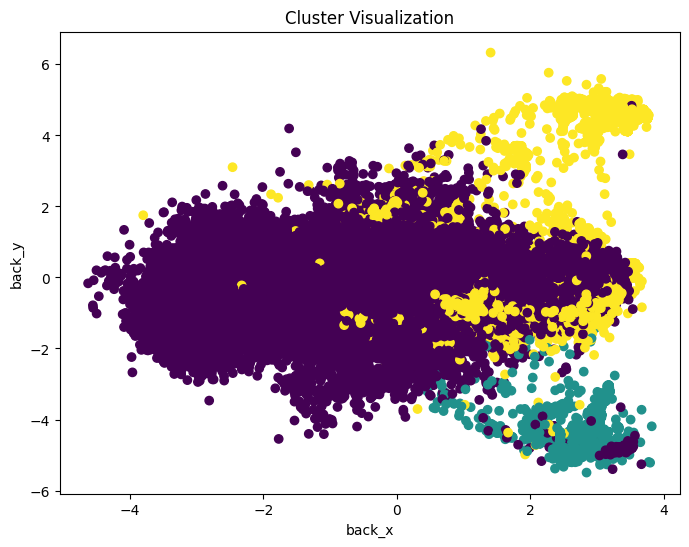

In [32]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k3['back_x'], scaled_df_k3['back_y'], c=scaled_df_k3['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()

In [34]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k3,kmeans.labels_,n_samples=100000,random_state=42)
score_k3=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 3 clusters:',score_k3)

Silhouette Score for 3 clusters: 0.4354534973673912


c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


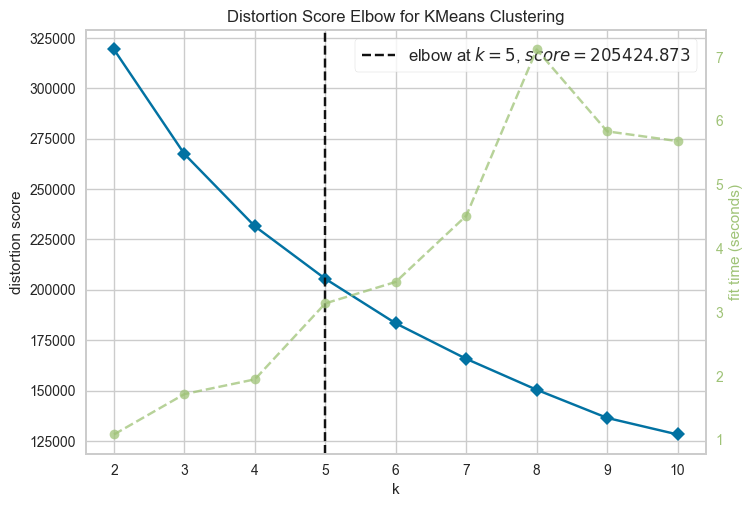

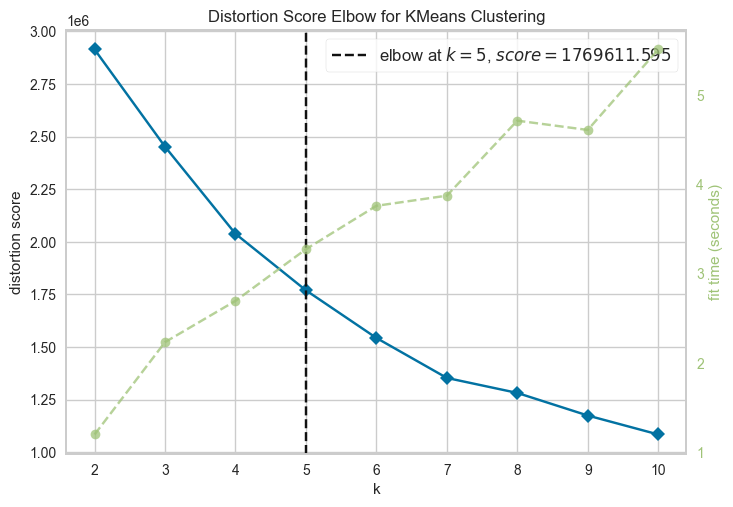

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(reduced_df)
sil_vis.show()

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(scaled_df)
sil_vis.show()

Silhouette Score for 2 clusters: 0.34488270593112824
Silhouette Score for 3 clusters: 0.36177019311093495
Silhouette Score for 4 clusters: 0.39091241852126024
Silhouette Score for 5 clusters: 0.3776635677693656
Silhouette Score for 6 clusters: 0.35923841403962586
Silhouette Score for 7 clusters: 0.2686248173064667
Silhouette Score for 8 clusters: 0.26911366491827515
Silhouette Score for 9 clusters: 0.2602124382981836
Silhouette Score for 10 clusters: 0.26051508024860837


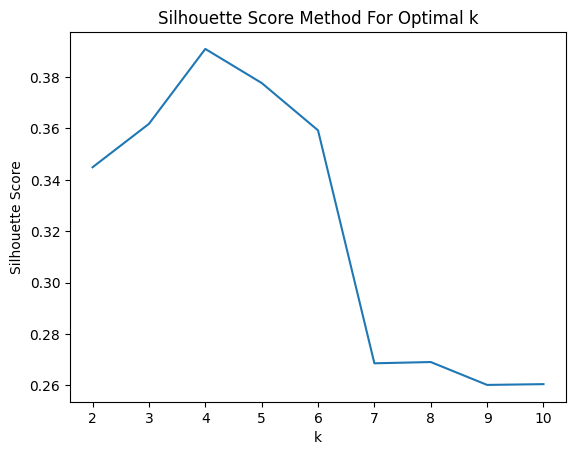

In [ ]:
# Silhouette Score Method
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.utils import resample
silhouette_scores = []

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df)
    sample_data,sample_labels=resample(scaled_df,kmeans.labels_,n_samples=100000,random_state=42)
    score=silhouette_score(sample_data,sample_labels)
    print('Silhouette Score for',i,'clusters:',score)
    silhouette_scores.append(score)

plt.title('Silhouette Score Method For Optimal k')
plt.plot(range(2,11),silhouette_scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()





Aς δοκιμάσουμε clustering μέσω KMeans με k=5, όπως μας υπέδειξε το Elbow Method

In [11]:
from sklearn.cluster import KMeans

scaled_df_k5=scaled_df.copy()
kmeans=KMeans(n_clusters=5,n_init=10)
kmeans.fit(scaled_df_k5)
scaled_df_k5['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k5,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)



c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster       0      1      2       3      4
review                                      
1          3873    493    137  115196      4
2          1277   3367   2259   22229      4
3           572     53     70   24817      0
4           466      3     32    7112      0
5           142      5      9    6560      1
6          1465    169     34   72686      0
7        222605  61643   4276    1688     58
8            75  11742  20328      18  10725
13         7869   1810     97   29620      0
14          133    261    166    5018      0
130         341     74     37    3727      0
140          50     15      0     722

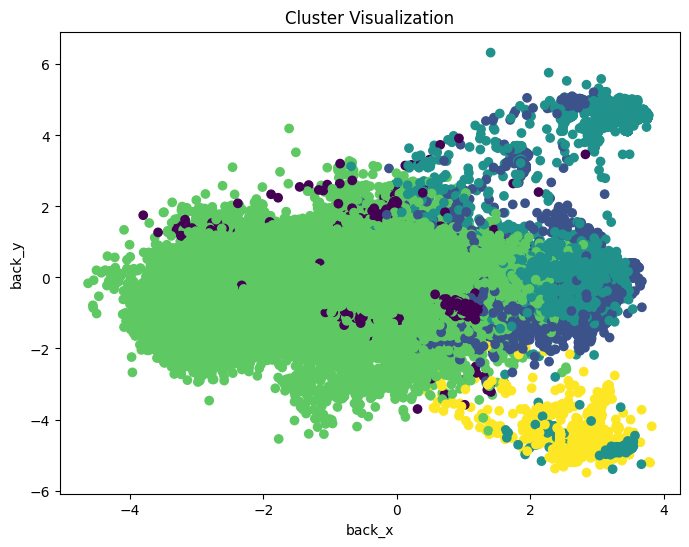

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k5['back_x'], scaled_df_k5['back_y'], c=scaled_df_k5['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()


In [14]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k5,kmeans.labels_,n_samples=100000,random_state=42)
score_k5=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 5 clusters:',score_k5)

Silhouette Score for 5 clusters: 0.4631433086785492


Τώρα θα βασιστούμε το k που μας υπέδειξε το silhouete score

In [26]:
from sklearn.cluster import KMeans

scaled_df_k4=scaled_df.copy()
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit(scaled_df_k4)
scaled_df_k4['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k4,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)


      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster       0      1       2      3
review                               
1          3567     24  116108      4
2          4028      3   25096      9
3           442     11   25059      0
4           249      0    7364      0
5            72      0    6644      1
6          1040      5   73309      0
7        283897      4    6311     58
8         11761  10100   10292  10735
13         3488      9   35899      0
14          113      0    5465      0
130         120      0    4059      0
140          14      0     773      0


In [27]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k4,kmeans.labels_,n_samples=100000,random_state=42)
score_k4=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 4 clusters:',score_k4)

Silhouette Score for 4 clusters: 0.4530486324736796


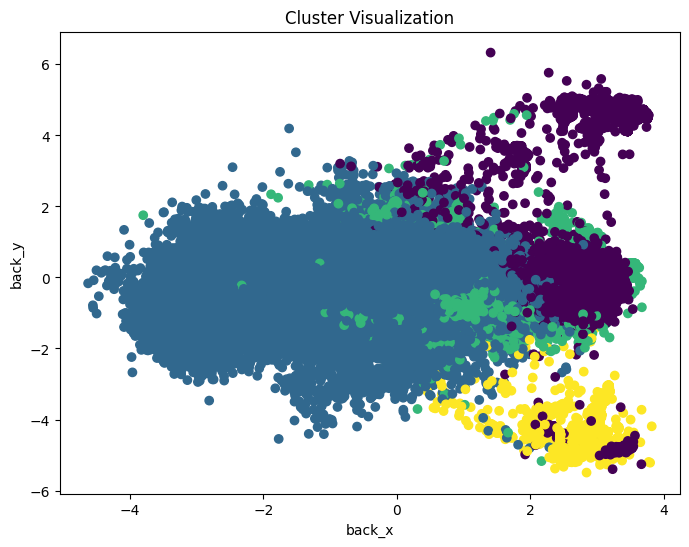

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k4['back_x'], scaled_df_k4['back_y'], c=scaled_df_k4['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()


"Κλέβοντας" και γνωρίζοντας τον αριθμό των κλάσεων ας δοκιμάσουμε clustering με τον αιρθμο των κλάσεων που υπάρχουν στο dataset μας

In [35]:
from sklearn.cluster import KMeans

scaled_df_k12=scaled_df.copy()
kmeans=KMeans(n_clusters=12,n_init=10)
kmeans.fit(scaled_df_k12)
scaled_df_k12['cluster']=kmeans.labels_
print(scaled_df.head())
comparsion=pd.merge(scaled_df_k12,pd.DataFrame({'review': review}),left_index=True,right_index=True)
contingency_table = pd.crosstab(comparsion['review'], comparsion['cluster'])
print(contingency_table)

      back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0   0.028773  0.630492  0.712099 -1.088415 -0.338208 -0.874095
10 -0.408916  0.435352  0.748670 -0.771853 -0.095744 -0.965267
20 -0.358190  0.486492  0.749646 -0.739207 -0.172539 -1.058262
30 -0.353282  0.379491  0.727452 -0.748875 -0.048551 -1.062338
40 -0.356448  0.392260  0.734592 -0.744995  0.029453 -1.107746
cluster      0      1      2      3      4     5     6      7      8      9   \
review                                                                         
1          1029      4   7748  61437    115     1    16     69  20965   1197   
2           725      3   1428   1861   2147     0     0    456  12475    159   
3           262      0   1941  20734      9     0     7     35    122    131   
4           256      0   1891   2742      0     0     0     36    524     14   
5            19      0   1205   3228      2     0     0      5    915      7   
6           450      0   3232  64235      3     0     5     28

In [36]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

sample_data,sample_labels=resample(scaled_df_k12,kmeans.labels_,n_samples=100000,random_state=42)
score_k12=silhouette_score(sample_data,sample_labels)
print('Silhouette Score for 12 clusters:',score_k12)

Silhouette Score for 12 clusters: 0.5385449328165981


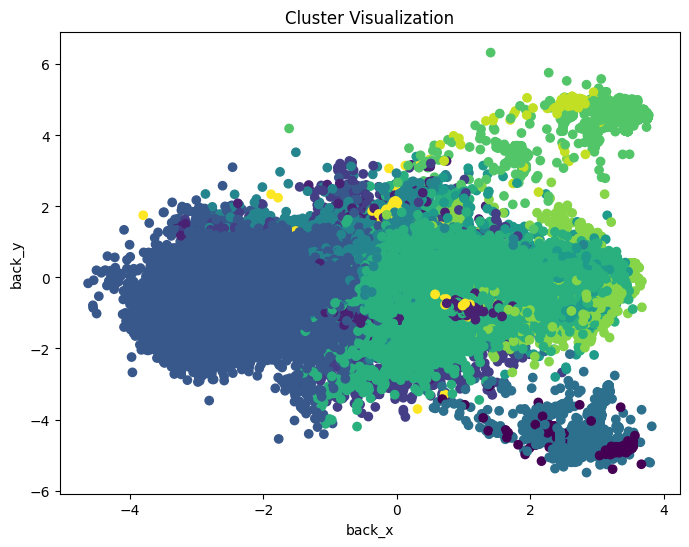

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df_k12['back_x'], scaled_df_k12['back_y'], c=scaled_df_k12['cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()
